<a href="https://colab.research.google.com/github/Fokhoruzzaman-Folik/IICT_PROJECT/blob/main/fol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Average, Minimum, Maximum Scores:
              mean  min  max
Student Name                
Alice         85.0   85   85
Bob           90.0   90   90
Charlie       78.0   78   78
David         92.0   92   92

Students with attendance < 75%:
  Student Name Student ID  Subject  Score  Attendance Percentage  \
2      Charlie   STU-1003  English     78                     65   

  Assignment Completion  
2                   Yes  

Students with missing assignments:
  Student Name Student ID  Subject  Score  Attendance Percentage  \
1          Bob   STU-1002  Science     90                     76   

  Assignment Completion  
1                    No  


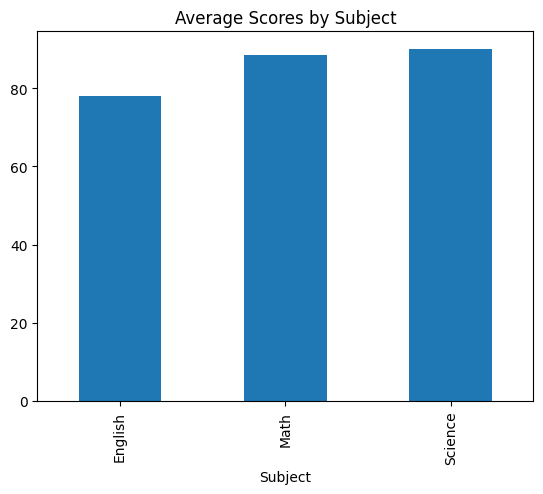

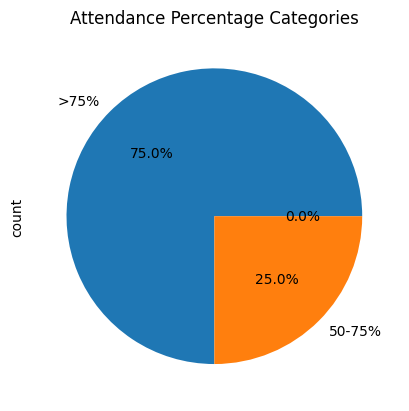


Performance Report:
  Student Name Student ID Grade
0        Alice   STU-1001     A
1          Bob   STU-1002     A
2      Charlie   STU-1003     B
3        David   STU-1004     A

Options:
1. Add new student data
2. Search for a student
3. Update student data
4. Exit


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import os

# Constants
CSV_FILE = "student_data.csv"
UPDATED_CSV_FILE = "updated_student_data.csv"

# Task 1: Data Collection and Storage
def create_sample_data():
    data = {
        "Student Name": ["Alice", "Bob", "Charlie", "David"],
        "Student ID": ["STU-1001", "STU-1002", "STU-1003", "STU-1004"],
        "Subject": ["Math", "Science", "English", "Math"],
        "Score": [85, 90, 78, 92],
        "Attendance Percentage": [88, 76, 65, 90],
        "Assignment Completion": ["Yes", "No", "Yes", "Yes"]
    }
    df = pd.DataFrame(data)
    df.to_csv(CSV_FILE, index=False)

# Task 2: Basic Data Handling
def read_csv_file(filename):
    try:
        return pd.read_csv(filename)
    except FileNotFoundError:
        print(f"Error: The file {filename} was not found.")
        return None

def write_csv_file(df, filename):
    df.to_csv(filename, index=False)
    print(f"Data written to {filename}")

# Task 3: Data Analysis and Manipulation
def analyze_data(df):
    print("\nAverage, Minimum, Maximum Scores:")
    print(df.groupby("Student Name")["Score"].agg(["mean", "min", "max"]))

    low_attendance = df[df["Attendance Percentage"] < 75]
    print("\nStudents with attendance < 75%:")
    print(low_attendance)

    missing_assignments = df[df["Assignment Completion"] == "No"]
    print("\nStudents with missing assignments:")
    print(missing_assignments)

def filter_by_subject(df, subject):
    return df[df["Subject"] == subject]

def convert_score_to_int(df):
    df["Score"] = df["Score"].astype(int)

# Task 4: Visualization
def plot_visualizations(df):
    avg_scores = df.groupby("Subject")["Score"].mean()
    avg_scores.plot(kind="bar", title="Average Scores by Subject")
    plt.show()

    attendance_categories = pd.cut(df["Attendance Percentage"], bins=[0, 50, 75, 100], labels=["<50%", "50-75%", ">75%"])
    attendance_categories.value_counts().plot(kind="pie", title="Attendance Percentage Categories", autopct="%1.1f%%")
    plt.show()

# Task 5: Applying Functions and Logic
def calculate_aggregate_scores(df):
    df["Total Score"] = df.groupby("Student Name")["Score"].transform("sum")

def determine_grade(score):
    if score >= 85:
        return "A"
    elif score >= 70:
        return "B"
    elif score >= 50:
        return "C"
    else:
        return "Fail"

def generate_performance_report(df):
    df["Grade"] = df["Score"].apply(determine_grade)
    print("\nPerformance Report:")
    print(df[["Student Name", "Student ID", "Grade"]])

# Task 6: Advanced Features
def log_function_execution(func):
    def wrapper(*args, **kwargs):
        print(f"Executing {func.__name__}...")
        return func(*args, **kwargs)
    return wrapper

@log_function_execution
def search_student(df, student_name=None, student_id=None):
    if student_name:
        return df[df["Student Name"].str.contains(student_name, case=False)]
    elif student_id:
        return df[df["Student ID"] == student_id]
    return None

# Task 7: Interactive Console Input/Output
def interactive_console(df):
    while True:
        print("\nOptions:")
        print("1. Add new student data")
        print("2. Search for a student")
        print("3. Update student data")
        print("4. Exit")
        choice = input("Enter your choice: ")

        if choice == "1":
            name = input("Student Name: ")
            student_id = input("Student ID: ")
            if not re.match(r"STU-\d{4}", student_id):
                print("Invalid Student ID format. It must be STU-XXXX.")
                continue
            subject = input("Subject: ")
            score = int(input("Score: "))
            attendance = int(input("Attendance Percentage: "))
            assignment = input("Assignment Completion (Yes/No): ")
            new_data = {"Student Name": name, "Student ID": student_id, "Subject": subject, "Score": score, "Attendance Percentage": attendance, "Assignment Completion": assignment}
            df = df.append(new_data, ignore_index=True)

        elif choice == "2":
            search_by = input("Search by (name/id): ")
            if search_by == "name":
                name = input("Enter student name: ")
                print(search_student(df, student_name=name))
            elif search_by == "id":
                student_id = input("Enter student ID: ")
                print(search_student(df, student_id=student_id))

        elif choice == "3":
            student_id = input("Enter student ID to update: ")
            student_data = df[df["Student ID"] == student_id]
            if student_data.empty:
                print("Student not found.")
                continue
            column = input("Enter the column to update (e.g., Score, Attendance Percentage): ")
            if column in df.columns:
                new_value = input(f"Enter new value for {column}: ")
                df.loc[df["Student ID"] == student_id, column] = new_value
            else:
                print("Invalid column name.")

        elif choice == "4":
            write_csv_file(df, UPDATED_CSV_FILE)
            break

        else:
            print("Invalid choice. Try again.")

# Main Program
if __name__ == "__main__":
    create_sample_data()
    data = read_csv_file(CSV_FILE)
    if data is not None:
        convert_score_to_int(data)
        analyze_data(data)
        plot_visualizations(data)
        calculate_aggregate_scores(data)
        generate_performance_report(data)
        interactive_console(data)
